# Image to Image Pipeline

Use a starting image to guide the diffusion process!

## Install and Download Images

In [1]:
%cd /content
!git clone https://github.com/mspronesti/stable-diffusion-pytorch

/content
Cloning into 'stable-diffusion-pytorch'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 82 (delta 31), reused 72 (delta 23), pack-reused 0
Unpacking objects: 100% (82/82), done.


In [2]:
# Note that all depencdencies of stable-diffusion-pytorch is pre-installed
# on Colab environment. This cell basically does nothing on Colab.
%cd /content/stable-diffusion-pytorch
%pip install -r requirements.txt

/content/stable-diffusion-pytorch
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 126 kB/s 


In [3]:
!wget https://pyxis.nymag.com/v1/imgs/24c/d4a/6fdd64a7c835b8325065b72e6fbfe59fb9-09-family-drawing1.rsquare.w330.jpg -O inp.jpg
!wget https://i.pinimg.com/736x/df/04/8b/df048ba2e5b1e970ba28b804c5489624.jpg -O streampunk.jpg

--2022-11-05 15:52:05--  https://pyxis.nymag.com/v1/imgs/24c/d4a/6fdd64a7c835b8325065b72e6fbfe59fb9-09-family-drawing1.rsquare.w330.jpg
Resolving pyxis.nymag.com (pyxis.nymag.com)... 151.101.2.217, 151.101.66.217, 151.101.130.217, ...
Connecting to pyxis.nymag.com (pyxis.nymag.com)|151.101.2.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19282 (19K) [image/jpeg]
Saving to: ‘inp.jpg’

inp.jpg             100%[===================>]  18.83K  --.-KB/s    in 0s      

2022-11-05 15:52:06 (100 MB/s) - ‘inp.jpg’ saved [19282/19282]

--2022-11-05 15:52:06--  https://i.pinimg.com/736x/df/04/8b/df048ba2e5b1e970ba28b804c5489624.jpg
Resolving i.pinimg.com (i.pinimg.com)... 199.232.148.84, 2a04:4e42:65::84
Connecting to i.pinimg.com (i.pinimg.com)|199.232.148.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 169508 (166K) [image/jpeg]
Saving to: ‘streampunk.jpg’

streampunk.jpg      100%[===================>] 165.54K  --.-KB/s    in 0.008s  

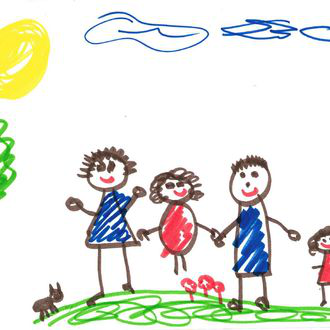

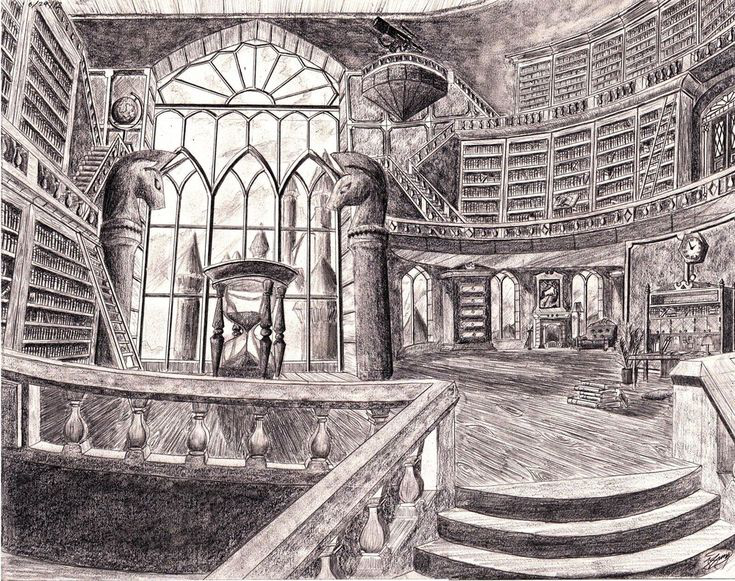

In [5]:
from PIL import Image

display(Image.open('inp.jpg'))
display(Image.open('streampunk.jpg'))

## Run

Downloading: "https://huggingface.co/mpronesti/stable-diffusion-pytorch/resolve/main/clip.pt" to /root/.cache/torch/hub/checkpoints/clip.pt


  0%|          | 0.00/469M [00:00<?, ?B/s]

Downloading: "https://huggingface.co/mpronesti/stable-diffusion-pytorch/resolve/main/encoder.pt" to /root/.cache/torch/hub/checkpoints/encoder.pt


  0%|          | 0.00/130M [00:00<?, ?B/s]

Downloading: "https://huggingface.co/mpronesti/stable-diffusion-pytorch/resolve/main/diffusion.pt" to /root/.cache/torch/hub/checkpoints/diffusion.pt


  0%|          | 0.00/3.20G [00:00<?, ?B/s]

 39   0: 100%|██████████| 40/40 [00:40<00:00,  1.01s/it]
Downloading: "https://huggingface.co/mpronesti/stable-diffusion-pytorch/resolve/main/decoder.pt" to /root/.cache/torch/hub/checkpoints/decoder.pt


  0%|          | 0.00/189M [00:00<?, ?B/s]

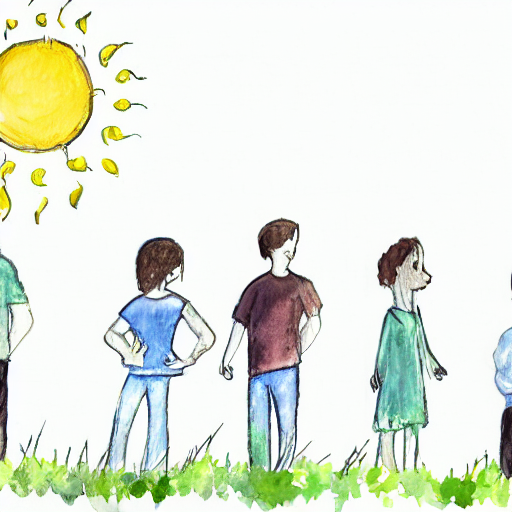

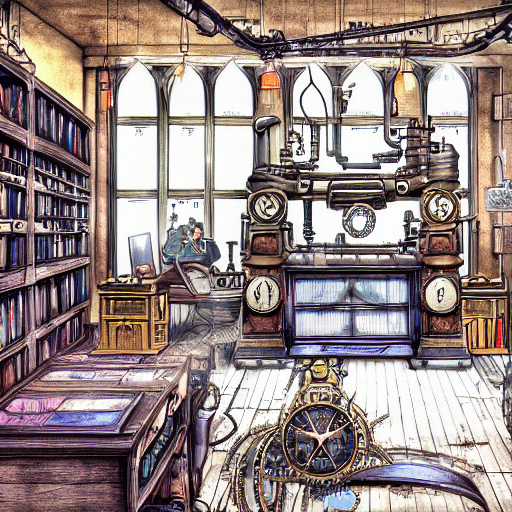

In [4]:
#@title Inference (takes about 30~40 seconds on default settings)

from stable_diffusion_pt import pipeline
from PIL import Image

prompts = [
    "a high quality sketch of people standing with sun and grass , watercolor , pencil color",
    "A digital illustration of a steampunk library with clockwork machines, 4k, detailed, trending in artstation, fantasy vivid colors"
]

uncond_prompt = ""  #@param { type: "string" }
uncond_prompts = [uncond_prompt] if uncond_prompt else None

img = Image.open('streampunk.jpg')

input_images = [
    'inp.jpg', # str
    img        # PIL.Image
]
strength = 0.8  #@param { type:"slider", min: 0, max: 1, step: 0.01 }

do_cfg = True  #@param { type: "boolean" }
cfg_scale = 7.5  #@param { type:"slider", min: 1, max: 14, step: 0.5 }
height = 512  #@param { type: "integer" }
width = 512  #@param { type: "integer" }
sampler = "k_lms"  #@param ["k_lms", "k_euler", "k_euler_ancestral"]
n_inference_steps = 50  #@param { type: "integer" }

use_seed = False  #@param { type: "boolean" }
if use_seed:
    seed = 42  #@param { type: "integer" }
else:
    seed = None

imgs = pipeline.generate(prompts=prompts, uncond_prompts=uncond_prompts,
                  input_images=input_images, strength=strength,
                  do_cfg=do_cfg, cfg_scale=cfg_scale,
                  height=height, width=width, sampler=sampler,
                  n_inference_steps=n_inference_steps, seed=seed,
                  device='cuda', idle_device='cpu')


for img in imgs:
  display(img)